# Goal: extract the signal due to gravity from accelerometer measurements

#### Experiment: I drove my car from home to Censio and back and used SensorLog on my iPhone to track the trip.  The total time for the trip was about 15 minutes.

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
# load the raw data
df = pd.read_csv('../Data/shaneiphone_exp2.csv')

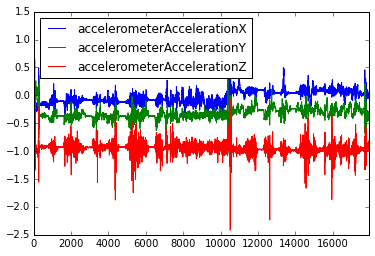

In [3]:
# plot accelerometer signal = gravity + user acceleration
df[['accelerometerAccelerationX', 'accelerometerAccelerationY', 'accelerometerAccelerationZ']].plot()

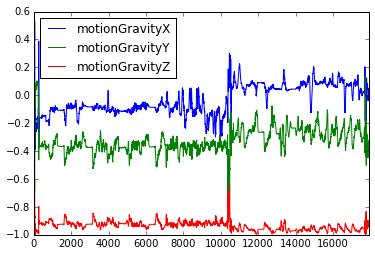

In [4]:
# plot gravity signal (this is what we're trying to reproduce)
df[['motionGravityX', 'motionGravityY', 'motionGravityZ']].plot()

#### Around sample 10500, the orientation of my phone in the X and Y directions changed because Nick and I swapped phones.

#### Extracting the gravity signal is largely a matter of applying a low pass filter, since the acceleration due to gravity is not changing with time.

In [5]:
# a Gaussian filter with a large window width is essentially a low pass filter
from scipy.ndimage import gaussian_filter

In [6]:
# a window that is too small retains noise from non-gravity signals
# a window that is too large eliminates variations in GravityXYZ due to orientation variations.
windowwidth = 25

In [7]:
# apply the smoothing function and store the results in a new column in the dataframe
temp = gaussian_filter(df['accelerometerAccelerationX'], windowwidth)
df['smoothaccelerometerAccelerationX'] = temp
temp = gaussian_filter(df['accelerometerAccelerationY'], windowwidth)
df['smoothaccelerometerAccelerationY'] = temp
temp = gaussian_filter(df['accelerometerAccelerationZ'], windowwidth)
df['smoothaccelerometerAccelerationZ'] = temp

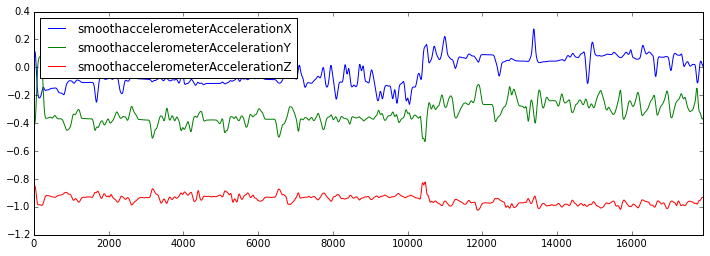

In [8]:
# plot the result
df[['smoothaccelerometerAccelerationX', 'smoothaccelerometerAccelerationY', 'smoothaccelerometerAccelerationZ']].plot(figsize=(12,4))

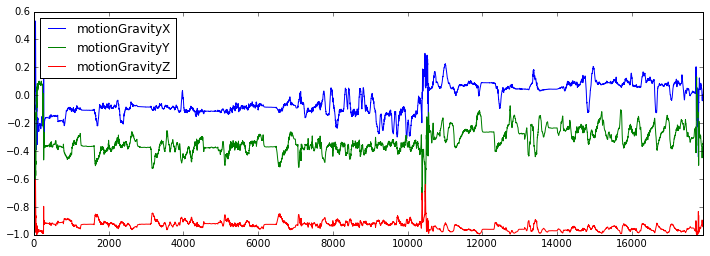

In [9]:
# and compare again to the gravity signal
df[['motionGravityX', 'motionGravityY', 'motionGravityZ']].plot(figsize=(12,4))

### Looks like a pretty good result.